In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('tingkat-polusi-pabrik-industricandi-semarang-2020-2022.csv', sep=';')
X = dataset.iloc[:, [1, 3]].values
y = dataset.iloc[:, -1].values    # Hanya kolom label/target

In [4]:
print(X)

[[45  2]
 [44  2]
 [43  2]
 ...
 [44 15]
 [44 15]
 [45 15]]


In [5]:
# Encode label kategori ke angka
from sklearn.preprocessing import StandardScaler, LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)  # Mengonversi kategori menjadi angka

In [6]:
# Menampilkan label yang diwakili oleh angka setelah encoding
for index, label in enumerate(labelencoder.classes_):
    print(f"{index}: {label}")

0: Good
1: Moderate
2: Unhealthy


In [7]:
print(y)

[1 1 0 ... 1 1 1]


In [8]:
#membagi data menjadi training set dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
print (X_train)

[[42  0]
 [55 18]
 [42  0]
 ...
 [42 14]
 [55 23]
 [40 12]]


In [10]:
print (X_test)

[[56 12]
 [31  0]
 [40  1]
 [55  2]
 [57  0]
 [53 21]
 [22  1]
 [53 21]
 [46  0]
 [34 14]
 [51 19]
 [29  2]
 [51  1]
 [50 16]
 [65 15]
 [54 12]
 [21 13]
 [32 14]
 [25  2]
 [44  2]
 [65 13]
 [47  0]
 [31 13]
 [52 24]
 [55  1]
 [51  0]
 [33 22]
 [35 16]
 [39 17]
 [51 14]
 [53  0]
 [34  2]
 [39 18]
 [51  0]
 [52 24]
 [35 15]
 [24 15]
 [27 14]
 [31 14]
 [53 20]
 [52 21]
 [65 17]
 [53 21]
 [55 22]
 [49  0]
 [51  0]
 [32  2]
 [55 17]
 [46  0]
 [54 22]
 [31  0]
 [56  1]
 [38 19]
 [38 17]
 [26  1]
 [51 19]
 [34 15]
 [34 15]
 [60 13]
 [57  1]
 [37 16]
 [53  3]
 [55 17]
 [53 24]
 [24  2]
 [42 14]
 [51 24]
 [36 15]
 [56 19]
 [64 13]
 [46  2]
 [40 15]
 [45 15]
 [39  0]
 [51  0]
 [26 13]
 [49  0]
 [43 17]
 [39  0]
 [66 13]
 [47 18]
 [55  2]
 [22 13]
 [44 15]
 [42  0]
 [40 21]
 [40 18]
 [51  0]
 [44 20]
 [27 14]
 [56  1]
 [33  0]
 [40 17]
 [34 19]
 [50  0]
 [42  0]
 [62 13]
 [64  0]
 [51  0]
 [37 15]
 [52 15]
 [54 14]
 [55 12]
 [41  6]
 [51  0]
 [43  2]
 [31 19]
 [33 17]
 [54 22]
 [33 15]
 [43 13]
 

In [11]:
print (y_train)

[0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 2 1 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 2 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 2 1
 2 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 2 0 1 1 0 2 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 2 1 0 0 1 1 1 2 0 1 0 2 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 2 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0
 1 0 0 2 1 1 1 1 2 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 2 0
 0 0 1 1 0 1 0 1 0 1 0 0 2 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 2 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 2 0 0 0 2 1 1 1 0 1
 1 2 1 1 1 0 2 1 0 1 2 1 1 1 0 0 0 0 0 1 0 1 0 1 2 1 1 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 1 2 1 1 1 2 0 0 1 2 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0
 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 0 0 1 0 2 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0
 0 0 0 1 1 0 2 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 2 0 1 2 0 1 1 1
 1 1 1 1 1 1 0 1 2 1 1 0 

In [12]:
print (y_test)

[1 0 2 0 1 0 2 0 0 1 0 2 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 0 2 1 0 2 0 1 1 1 2 0 2 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1
 1 2 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 2 0 0 2 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 2 0 0 1 0 1 1 0 0 2 1 1 0 1 0 1 0 1 1 0 0
 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 2 0 1 1 0 1 2 1 1 0 1 1]


In [13]:
#melakukan standarisasi karena beberapa algoritma machine learning bekerja lebih baik
#ketika data berada pada skala yang seragam
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print (X_train)

[[-0.2166537  -1.20986795]
 [ 0.97270447  0.96007475]
 [-0.2166537  -1.20986795]
 ...
 [-0.2166537   0.47786526]
 [ 0.97270447  1.56283661]
 [-0.39963188  0.23676051]]


In [15]:
print (X_test)

[[ 1.06419356  0.23676051]
 [-1.22303369 -1.20986795]
 [-0.39963188 -1.08931558]
 [ 0.97270447 -0.96876321]
 [ 1.15568265 -1.20986795]
 [ 0.78972629  1.32173186]
 [-2.0464355  -1.08931558]
 [ 0.78972629  1.32173186]
 [ 0.14930266 -1.20986795]
 [-0.94856642  0.47786526]
 [ 0.60674811  1.08062712]
 [-1.40601187 -0.96876321]
 [ 0.60674811 -1.08931558]
 [ 0.51525902  0.71897   ]
 [ 1.88759537  0.59841763]
 [ 0.88121538  0.23676051]
 [-2.13792459  0.35731289]
 [-1.1315446   0.47786526]
 [-1.77196823 -0.96876321]
 [-0.03367552 -0.96876321]
 [ 1.88759537  0.35731289]
 [ 0.24079175 -1.20986795]
 [-1.22303369  0.35731289]
 [ 0.6982372   1.68338898]
 [ 0.97270447 -1.08931558]
 [ 0.60674811 -1.20986795]
 [-1.04005551  1.44228424]
 [-0.85707733  0.71897   ]
 [-0.49112097  0.83952238]
 [ 0.60674811  0.47786526]
 [ 0.78972629 -1.20986795]
 [-0.94856642 -0.96876321]
 [-0.49112097  0.96007475]
 [ 0.60674811 -1.20986795]
 [ 0.6982372   1.68338898]
 [-0.85707733  0.59841763]
 [-1.86345732  0.59841763]
 

In [16]:
#menerapkan algoritma Naïve Bayes dengan varian Gaussian Naïve Bayes untuk melakukan klasifikasi
#pada dataset yang sudah dipisahkan menjadi data training.
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
#untuk memprediksi label atau kategori dari data X_test (data uji/test set) setelah model
#Gaussian Naïve Bayes selesai dilatih
y_pred = classifier.predict(X_test)

In [18]:
#menampilkan confusion matrix yang merupakan salah satu alat evaluasi dalam klasifikasi untuk
#memahami performa model dengan membandingkan prediksi dengan nilai sebenarnya
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0  94  11]
 [  0 121  19]
 [  0   3  11]]


C:\Users\Meta\AppData\Local\Temp\ipykernel_1752\870082988.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


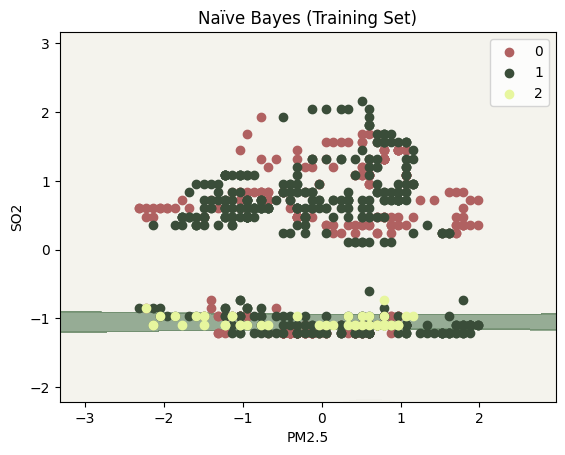

In [22]:
#memvisualisasikan klasifier naive bayes ke dalam ruang fitur dua dimensi
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('#F1F0E8', '#739072')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#B06161','#3A4D39', '#e7f69e'))(i), label = j)
plt.title('Naïve Bayes (Training Set)')
plt.xlabel('PM2.5')
plt.ylabel('SO2')
plt.legend()
plt.show()